In [1]:
using BoundaryValueDiffEq
using Plots 

In [2]:
# solves the scalar diffusion equatiobn -d^4/dx^4 u(x) = f(x)
# on the interval 0 < x < 80
# supplied with Dirichlet or Neumann boundary conditions 

In [3]:
# define spatial range 
xspan = (0.0, 80.)

(0.0, 80.0)

In [4]:
# define the source function f(x)
function sourceFct(x)
    X0 = 60
    σ = 0.8
    A = 10.
    return  A .* exp.(.-((x .- X0).^2)./σ^2)
    #return 0 .* x + 10
end

sourceFct (generic function with 1 method)

In [20]:
# define diffusion equation 
function diffusion!(du, u, p, x)
    # u[1]: concentration 
    # u[2]: fluc 
    # d/dx(concentration)  = flux 
    du[1] = u[2]
    # d/dx(flux)  = sourceFct
    du[2] = u[3]
    du[3] = u[4]
    du[4] = 0 + 1
end

diffusion! (generic function with 1 method)

In [21]:
# define boundary conditions 
function boundaries!(residual, u, p, x)
    # residual boundary condition in the left end-point 
    residual[1] = u[1][1] - 0.
    residual[2] = u[2][1] - 0.
    residual[end-1] = u[end-1][end] - 0.
    residual[end] = u[end][end] - 0
end

boundaries! (generic function with 1 method)

In [22]:
# Parameter for a copper bar 
d= 8.92 #density 
sh= 0.092 #specific_heat
tc= 0.95 #thermal_conductivity
N =100
l = 80.
dx = l/N
xvec = Vector(0:dx:l)

c = ( tc / (sh * d))^(1/2) 
p = [c^2]; 

In [37]:
#set the boundary value problem to solve
bvp1 = BVProblem(diffusion!, boundaries!, [0., 0.,0.,0.], xspan,p)

# set the boundary value problem  
sol1 = solve(bvp1, GeneralMIRK4(), dt = 1)

retcode: Failure
Interpolation: 1st order linear
t: 81-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
  ⋮
 69.0
 70.0
 71.0
 72.0
 73.0
 74.0
 75.0
 76.0
 77.0
 78.0
 79.0
 80.0
u: 81-element Vector{Vector{Float64}}:
 [-2.092785800768889e-5, -3806.6099786362643, 7639.581187767609, -79.33329779416022]
 [2.8447233145360833e-5, 3793.4712361272195, 7560.7478869722145, -78.33329759759255]
 [7560.831339277825, 11315.219151140167, 7482.914574490837, -77.33328735226576]
 [22604.660573244175, 18759.63374794429, 7406.081270535771, -76.33324931342139]
 [45054.65442175512, 26127.715052461837, 7330.248017321957, -75.33317135328622]
 [74834.979624223, 33420.46313901483, 7255.414867683366, -74.33305132688419]
 [111870.80302062986, 40638.87813712426, 7181.581872416922, -73.33290041788639]
 [156088.29160487396, 47783.96022256287, 7108.749062881064, -72.33274430893115]
 [207414.6125593056, 54856.7095893142, 7036.916433242859, -71.33261986757303]
 [

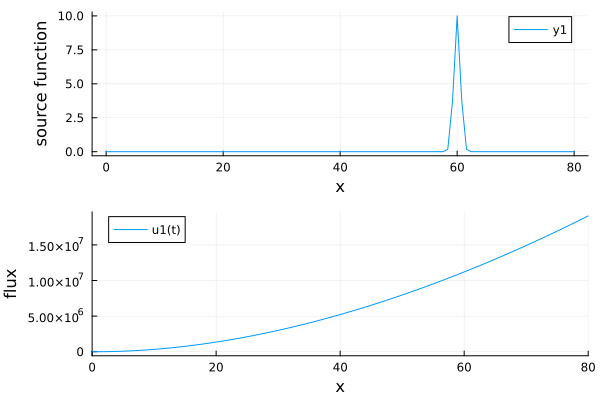

In [34]:
# plot the computed solution
xvec = Vector(0:dx:l)
fvec = sourceFct.(xvec)
p1 = plot(xvec,fvec)
xlabel!("x") 
ylabel!("source function")

p3 = plot(sol1, idxs = (1))
xlabel!("x") 
ylabel!("flux")

plot(p1,p3,layout=(2,1))

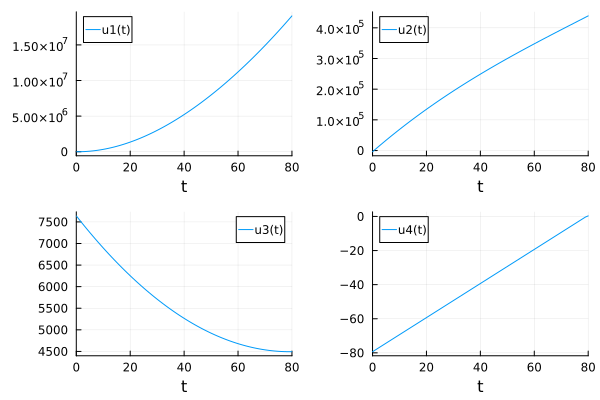

In [35]:
plot(sol1,layout=(2,2))

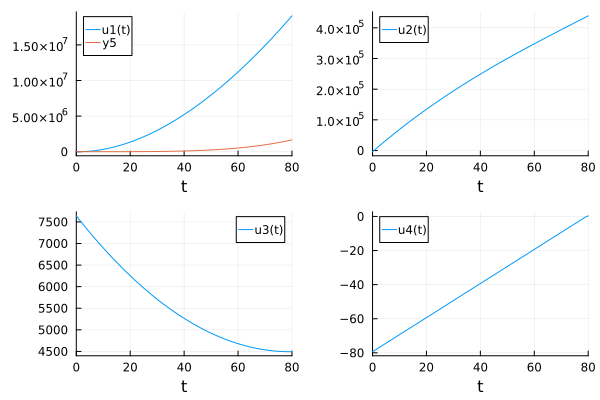

In [36]:
w(x) = 1/24*(x - 2*x^3 + x^4)
plot!(w)